In [27]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1 Read in census csv
census_data = pd.read_csv("../00_input/census_data.csv", dtype={'ZCTA': 'str'})
census_data.head()

,Median Household Income,Population,Median Age,Per Capita Income,Poverty Count,Unemployment Count,ZCTA
0,13092.0,17242.0,40.5,6999.0,10772.0,2316.0,00601
1,16358.0,38442.0,42.3,9277.0,19611.0,1927.0,00602
2,16603.0,48814.0,41.1,11307.0,24337.0,3124.0,00603
3,12832.0,6437.0,43.3,5943.0,4163.0,230.0,00606
4,19309.0,27073.0,42.1,10220.0,11724.0,1290.0,00610


In [4]:
# Column Reordering
census_data = census_data[["ZCTA", "Population", "Median Age", "Median Household Income", "Per Capita Income",
                           "Poverty Count", "Unemployment Count"]]
census_data.head()

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0


In [5]:
# Overview of the census dataframe
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     33120 non-null  object 
 1   Population               33120 non-null  float64
 2   Median Age               33120 non-null  float64
 3   Median Household Income  33085 non-null  float64
 4   Per Capita Income        32776 non-null  float64
 5   Poverty Count            33085 non-null  float64
 6   Unemployment Count       33085 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


### Invalid/Null Values in the dataset 
The Median Household Income, Median Age and Per Capita Income columns contain similar extreme values of -666,666,666.0. Some of the rows that contain these values happen to have seemingly unreasonable values in the other columns: Population, Poverty Count and Unemployment Count. As such, we have made the decision to drop some of the rows that contain the values -666,666,666.0 due to concern that the other values in those rows are inaccurate.

In [6]:
# 2 Get min values for each column
min_income = census_data['Median Household Income'].min()
min_pop = census_data['Population'].min()
min_age = census_data['Median Age'].min()
min_per_capita = census_data['Per Capita Income'].min()
min_poverty = census_data['Poverty Count'].min()
min_unemp = census_data['Unemployment Count'].min()

print(f"The min Median Household Income is {min_income}")
print(f"The min Population is {min_pop}")
print(f"The min Median Age is {min_age}")
print(f"The min Per Capita Income is {min_per_capita}")
print(f"The min Poverty Count is {min_poverty}")
print(f"The min Unemployment Count is {min_unemp}")

The min Median Household Income is -666666666.0
The min Population is 0.0
The min Median Age is -666666666.0
The min Per Capita Income is -666666666.0
The min Poverty Count is 0.0
The min Unemployment Count is 0.0


In [7]:
# Check the rows for Median Age that contain -666,666,666.0
df_age = census_data[census_data['Median Age'] == min_age]
df_age

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
110,00950,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0
111,00951,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0
167,01066,9.0,-666666666.0,-666666666.0,NaN,0.0,0.0
206,01199,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0
514,02203,25.0,-666666666.0,-666666666.0,NaN,13.0,0.0
...,...,...,...,...,...,...,...
33080,99923,15.0,-666666666.0,-666666666.0,NaN,0.0,0.0
33099,87539,22.0,-666666666.0,NaN,NaN,NaN,NaN
33100,87554,0.0,-666666666.0,NaN,NaN,NaN,NaN
33106,87581,32.0,-666666666.0,NaN,NaN,NaN,NaN


In [8]:
# Check unique values in Median Household Income when Median Age = -666,666,666.0
df_age["Median Household Income"].unique()

array([-6.66666666e+08,             nan])

In [9]:
# Check unique values in Per Capita Income when Median Age = -666,666,666.0
df_age["Per Capita Income"].unique()

array([-6.66666666e+08,             nan])

As can be seen above, when Median Age equals to -666,666,666.0, the values in Median Household Income and Per Capita Income are either -666,666,666.0 or null. Hence, we'll drop all of those rows.

In [10]:
# 3 Drop rows where Median Age = -666666666.0 (564 rows dropped --> 32,556 rows left)
clean_census = census_data[census_data['Median Age'] != min_age]
clean_census

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0
...,...,...,...,...,...,...,...
33114,87523,759.0,45.7,NaN,NaN,NaN,NaN
33115,87515,363.0,44.2,NaN,NaN,NaN,NaN
33117,87511,2896.0,36.0,NaN,NaN,NaN,NaN
33118,87578,245.0,48.0,NaN,NaN,NaN,NaN


In [11]:
# 4 Reset the index
clean_census = clean_census.reset_index(drop=True)
clean_census

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0
...,...,...,...,...,...,...,...
32551,87523,759.0,45.7,NaN,NaN,NaN,NaN
32552,87515,363.0,44.2,NaN,NaN,NaN,NaN
32553,87511,2896.0,36.0,NaN,NaN,NaN,NaN
32554,87578,245.0,48.0,NaN,NaN,NaN,NaN


In [12]:
# 5 Counting all null values per column
null_counts = clean_census.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Per Capita Income          100
Unemployment Count          31
Poverty Count               31
Median Household Income     31
dtype: int64

In [13]:
# Identify the last 31 rows to find the 31 NaN values found in Unemployment, Poverty and Median HH Income columns
clean_census.tail(31)

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
32525,87533,133.0,25.8,NaN,NaN,NaN,NaN
32526,87012,255.0,47.5,NaN,NaN,NaN,NaN
32527,87064,84.0,57.7,NaN,NaN,NaN,NaN
32528,87046,162.0,38.1,NaN,NaN,NaN,NaN
32529,87548,1341.0,37.8,NaN,NaN,NaN,NaN
32530,87575,775.0,48.6,NaN,NaN,NaN,NaN
32531,87530,1110.0,41.5,NaN,NaN,NaN,NaN
32532,87577,385.0,57.0,NaN,NaN,NaN,NaN
32533,87527,761.0,30.6,NaN,NaN,NaN,NaN
32534,87549,518.0,41.9,NaN,NaN,NaN,NaN


In [14]:
# 6 Drop the 31 rows as there are NaN values in: Median HH Income, Per Capita Income, Poverty and Unemployment Count
# We have no use for this data
clean_census = clean_census.dropna(subset=['Median Household Income'])
clean_census

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0
...,...,...,...,...,...,...,...
32520,99922,330.0,39.5,34028.0,18213.0,129.0,11.0
32521,99925,927.0,43.6,57375.0,25840.0,172.0,89.0
32522,99926,1635.0,34.5,53409.0,22453.0,235.0,138.0
32523,99927,38.0,55.5,-666666666.0,13658.0,28.0,0.0


In [15]:
# Check if the right number of rows have been dropped (should be 594)
print(len(census_data))
print(len(clean_census))

33120
32525


In [16]:
# Counting all null values per column after Null values are removed
null_counts = clean_census.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Per Capita Income    69
dtype: int64

In [17]:
# Checking the rows that have -666666666.0 as Median HH income 
df_HH_income = clean_census[clean_census['Median Household Income'] == min_income]
df_HH_income

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
42,00694,69.0,73.6,-666666666.0,6880.0,24.0,0.0
86,00786,348.0,64.0,-666666666.0,14278.0,46.0,0.0
107,00934,79.0,32.8,-666666666.0,16956.0,0.0,26.0
108,00936,812.0,77.3,-666666666.0,7132.0,0.0,0.0
115,00960,2221.0,32.8,-666666666.0,3069.0,23.0,6.0
...,...,...,...,...,...,...,...
32469,99757,14.0,60.0,-666666666.0,25536.0,3.0,0.0
32479,99767,60.0,17.5,-666666666.0,18652.0,14.0,3.0
32486,99774,11.0,25.8,-666666666.0,6964.0,9.0,0.0
32500,99790,10.0,50.5,-666666666.0,68700.0,0.0,2.0


The 1634 rows with the values in "Median Household Income" column of -666666666.0 seem to have the other columns with normal-looking values. Hence, we'll only change these -666666666.0 values into NaN to keep the data for further analysis.

In [18]:
#7 Change remaining -666666666.0 values in Median HH Income to NaN 
clean_census = clean_census.replace(min_income, np.nan)

In [19]:
# Counting all null values per column after -666666666.0 is changed to NaN 
null_counts = clean_census.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Median Household Income    1634
Per Capita Income            69
dtype: int64

In [20]:
# Format Standardization: Change Population, Poverty and Unemployment Count to int 
clean_census['Population'] = clean_census['Population'].astype(int)
clean_census['Poverty Count'] = clean_census['Poverty Count'].astype(int)
clean_census['Unemployment Count'] = clean_census['Unemployment Count'].astype(int)

In [21]:
# Reset the index
clean_census = clean_census.reset_index(drop=True)
clean_census

,ZCTA,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
0,00601,17242,40.5,13092.0,6999.0,10772,2316
1,00602,38442,42.3,16358.0,9277.0,19611,1927
2,00603,48814,41.1,16603.0,11307.0,24337,3124
3,00606,6437,43.3,12832.0,5943.0,4163,230
4,00610,27073,42.1,19309.0,10220.0,11724,1290
...,...,...,...,...,...,...,...
32520,99922,330,39.5,34028.0,18213.0,129,11
32521,99925,927,43.6,57375.0,25840.0,172,89
32522,99926,1635,34.5,53409.0,22453.0,235,138
32523,99927,38,55.5,NaN,13658.0,28,0


In [22]:
# Overview of the census dataframe after cleaning
clean_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32525 entries, 0 to 32524
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     32525 non-null  object 
 1   Population               32525 non-null  int32  
 2   Median Age               32525 non-null  float64
 3   Median Household Income  30891 non-null  float64
 4   Per Capita Income        32456 non-null  float64
 5   Poverty Count            32525 non-null  int32  
 6   Unemployment Count       32525 non-null  int32  
dtypes: float64(3), int32(3), object(1)
memory usage: 1.4+ MB


In [26]:
# Use a .describe() to get summary stats of the clean dataset 
summary_stat = round(clean_census.describe(),2)
summary_stat

,Population,Median Age,Median Household Income,Per Capita Income,Poverty Count,Unemployment Count
count,32525.00,32525.00,30891.00,32456.00,32525.00,32525.00
mean,10029.70,42.47,59031.43,29912.92,1406.16,298.73
std,14687.28,8.98,25240.24,13871.06,2681.21,521.52
min,5.00,2.40,2499.00,42.00,0.00,0.00
25%,769.00,36.90,42981.00,22190.75,81.00,14.00
50%,2943.00,41.90,53958.00,27249.50,333.00,71.00
75%,13730.00,47.30,68333.00,33996.00,1456.00,353.00
max,122814.00,98.30,250001.00,461279.00,35874.00,9120.00


In [23]:
# Export the census data to csv to load to database
clean_census.to_csv('clean_census.csv', index=False)

## Plots 
We are going to look at different plots that map out relationships between different socio-eocnomic measures and outliers in the dataset 

In [34]:
# Store columns in variables 
med_age = clean_census['Median Age']
med_inc = clean_census['Median Household Income']
pop = clean_census['Population']
per_inc = clean_census['Per Capita Income']
pov_count = clean_census['Poverty Count']
unemp_count = clean_census['Unemployment Count']

## Scatter Plots 
The scatter plots below map the relationships between various variables in the census dataset


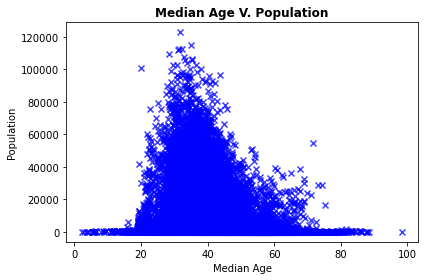

In [36]:
# Generate scatter plot - Population V Median Age
plt.scatter(med_age, pop, marker="x", facecolors="blue", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Population")
plt.title("Median Age V. Population", weight="bold")
plt.tight_layout()

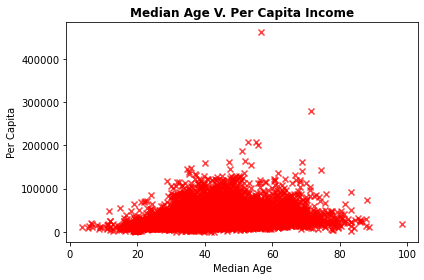

In [41]:
# Generate scatter plot - Median Age V Median HH Income 
plt.scatter(med_age, per_inc, marker="x", facecolors="red", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Per Capita")
plt.title("Median Age V. Per Capita Income", weight="bold")
plt.tight_layout()

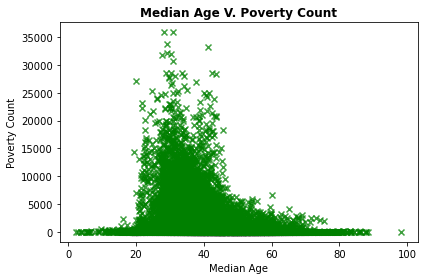

In [37]:
# Generate scatter plot - Median Age V Poverty Count 
plt.scatter(med_age, pov_count, marker="x", facecolors="green", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Poverty Count")
plt.title("Median Age V. Poverty Count", weight="bold")
plt.tight_layout()

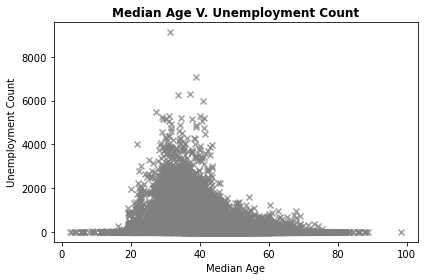

In [39]:
# Generate scatter plot - Median Age V Unemployment Count
plt.scatter(med_age, unemp_count, marker="x", facecolors="grey", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Unemployment Count")
plt.title("Median Age V. Unemployment Count", weight="bold")
plt.tight_layout()